In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

In [3]:
#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state =11)

In [4]:
#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

In [9]:
#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf,out_file='tree.dot',class_names = iris_data.target_names, feature_names = iris_data.feature_names,\
                impurity= True, filled = True)

In [12]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [14]:
#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

Feature importances:
[0.025 0.    0.555 0.42 ]


In [15]:
#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))

sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

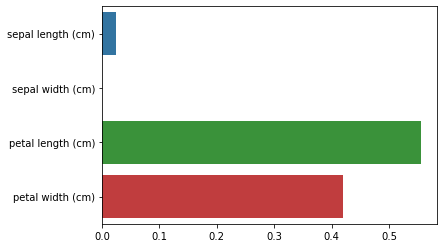

In [16]:
#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

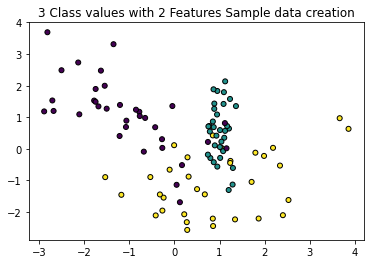

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features =2, n_redundant =0, n_informative=2,
                                          n_classes =3, n_clusters_per_class=1,random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels, s=25, edgecolor='k')

In [18]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

NameError: name 'visualize_boundary' is not defined